<a href="https://colab.research.google.com/github/codestates/ds-sc13x/blob/master/sc13x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SC13x Linear Algebra

## 1. $\vec{c} \cdot \vec{d}$ 를 구해보세요. 이 두 개의 vector는 orthogonal 관계 (직교)에 있나요? 왜 그런가요? 왜 아닌가요?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [3]:
import numpy as np

c=np.array(['3','7','-2','12'])
d=np.array(['9','-7','4','6'])

c= c.astype('int')
d= d.astype('int')
np.dot(c,d)


42

In [ ]:
# 아니다. 직교 관계라면 내적은 0이 된다.

## 2. $E^{-1}$ 와 $E^{T}$ 를 구하세요.

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [4]:
E= np.array([[7,4,2],[1,3,-1],[2,6,-4]])


In [7]:
np.linalg.inv(E)
E.T

print(np.linalg.inv(E))
print(E.T)

[[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]
[[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]


## 3. $|F|$ 를 구하세요. 이 데이터는 어떤 의미가 있나요?

\begin{align}
F = 
\begin{bmatrix}
    2 & -2 & 5 \\
    4 & 1 & 10 \\
    12 & 6 & 30
\end{bmatrix}
\end{align}

In [12]:
F=np.array([[2,-2,5],[4,1,10],[12,6,30]])

In [13]:
np.linalg.det(F)

# 역행렬이 없으며, F행렬의 면적이 0이다. 데이터는 선형관계를 가지고 있다. 선형 변환으로 F를 사용하면 차원이 낮아진다.

0.0

## 4. 다음 데이터의 covariance, correlation을 구하세요.

- x = [820, 760, 1250, 990, 1080, 1450, 1600]

- y = [0, 1, 7, 1, 0, 6, 4]

In [ ]:
x=np.array([820, 760, 1250, 990, 1080, 1450, 1600])
y=np.array([0, 1, 7, 1, 0, 6, 4])

In [ ]:
np.cov(x,y)[0,1]

670.2380952380952

In [ ]:
np.corrcoef(x,y)[0,1]

0.7284634644730714

## 5. 다음 데이터를 정규화 하세요.

아래 링크를 참조하세요.

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [ ]:
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

df

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [ ]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()

label = df['Country']

df1=df.drop(['Country'],axis=1)

df_scaled= scaler.fit(df1).transform(df1)

## 6. 위 데이터에 PCA 를 적용 후 scatterplot을 그리세요.

In [ ]:
from sklearn import decomposition

pca= decomposition.PCA(n_components =4)
pc= pca.fit_transform(df_scaled)

pc_df= pd.DataFrame(data=pc,columns= ['PC1','PC2','PC3','PC4'])

pc_df

,PC1,PC2,PC3,PC4
0,-0.954490,0.328318,1.829829,2.031442e-16
1,-4.520951,-1.735380,-0.781412,2.031442e-16
2,0.487978,3.233672,-0.765148,2.031442e-16
3,4.987462,-1.826611,-0.283270,2.031442e-16


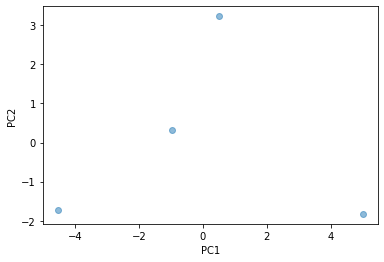

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(pc_df['PC1'], pc_df['PC2'], alpha = .5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

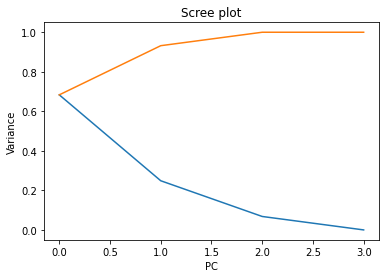

In [ ]:
# scree plot
import numpy as np


def scree_plot(pca):
  num_components = len(pca.explained_variance_ratio_) #  components의 개수
  ind = np.arange(num_components) # x값으로 쓰기 위해 conponents의 개수를 나열함
  vals= pca.explained_variance_ratio_ # 각 값의 데이터 가중치

  cumvals = np.cumsum(vals) # 데이터 누적합

  ax= plt.subplot()
  ax.plot(ind,vals)
  ax.plot(ind,cumvals)


  ax.set_xlabel("PC")
  ax.set_ylabel("Variance")
  plt.title('Scree plot')

scree_plot(pca)

# 파랑은 scree plot 주황은 가중치의 누적합. 누적합을 봤을 때 pc는 하나만 있어도 데이터의 대부분을 얻는다.

## 7. 아래 데이터에 대해 k-means clustering을 적용 후, 결과를 그래프로 그리세요.



In [ ]:
points = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/sc13x/data.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


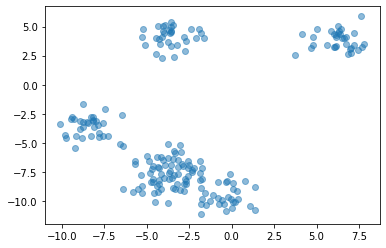

In [ ]:
plt.scatter(points['x'], points['y'], alpha = .5)
plt.show()

In [ ]:
from sklearn.cluster import KMeans 

kmeans=KMeans(n_clusters=5, random_state=42).fit(points)

labels=kmeans.labels_

labels

l= pd.DataFrame(labels)

com=points

com['predict']=l

com

c0,c1,c2,c3,c4=kmeans.cluster_centers_ # 각 클러스터 센터의 좌표값 구성은 (x,y,순서)



array([-3.7805392 , -7.60590614,  1.        ])

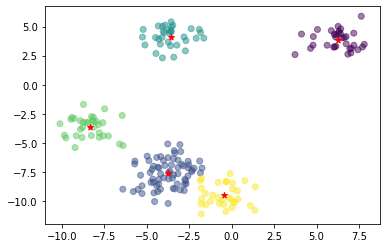

In [ ]:
plt.scatter(com['x'],com['y'],c=com['predict'],alpha=0.5) 
plt.scatter(c0[0],c0[1],marker='*',c="r")
plt.scatter(c1[0],c1[1],marker='*',c="r")
plt.scatter(c2[0],c2[1],marker='*',c="r")
plt.scatter(c3[0],c3[1],marker='*',c="r")
plt.scatter(c4[0],c4[1],marker='*',c="r")

# SC 3점 요구사항:
위에서 요구된 사항들을 모두 정확하게 만족하였으며, 아직 시간이 남았다면 아래 2개의 내용들 중 하나를 만족하는 경우 3점을 얻을 수 있습니다.

아래 요구사항들은 모두 optional 임을 다시 한 번 강조합니다. (필수 요구사항이 아닙니다.)

- 6번의 PCA 결과에 대해서 Scree plot을 추가하세요.

- 7번에서 k값을 선택하는 과정을 논리적으로 설명하세요.


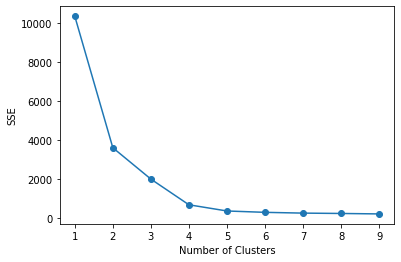

In [ ]:
# 사실 7번은 scatter plot을 그려보고 어느 정도 클러스터의 형태가 나타났기에 이게 맞게 k의 수를 정했다. 

# 이번에는 elbow 기법을 써서 적정 클러스터를 구해주겠다.

# for 문을 통한 응집도 검사

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 

def elbow(X):
  sse=[]
  for i in range(1,10):
    km= KMeans(n_clusters=i, random_state=42,init='k-means++').fit(points)
    sse.append(km.inertia_)
  plt.plot(range(1,10),sse,marker='o')
  plt.xlabel('Number of Clusters')
  plt.ylabel('SSE')
  plt.show()

elbow(points)

# 이 그래프를 보면 클러스터의 개수는 4개 혹은 5개로 결정할 수 있다고 본다.

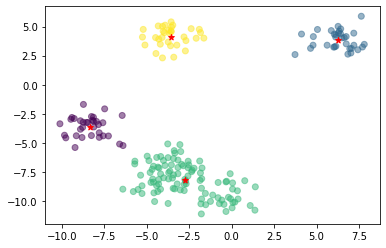

In [ ]:
# 클러스터 4개 적용
from sklearn.cluster import KMeans 

kmeans=KMeans(n_clusters=4, random_state=42).fit(points)

labels=kmeans.labels_

labels

l= pd.DataFrame(labels)

com=points

com['predict']=l

com

c0,c1,c2,c3=kmeans.cluster_centers_ 

plt.scatter(com['x'],com['y'],c=com['predict'],alpha=0.5)
plt.scatter(c0[0],c0[1],marker='*',c="r")
plt.scatter(c1[0],c1[1],marker='*',c="r")
plt.scatter(c2[0],c2[1],marker='*',c="r")
plt.scatter(c3[0],c3[1],marker='*',c="r")

